In [2]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression .ipynb file
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [3]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
y = 9.8 * x1 + 3.2*x2 + 7.6
print("y = ", end='')
sp.pprint(y)


y = 9.8⋅x₁ + 3.2⋅x₂ + 7.6


In [4]:
def ModelEquation(x1,x2):
    return 9.8*x1 + 3.2*x2 + 7.6

In [6]:
total_data_points = 50000
x1 = np.linspace(0, 2, total_data_points)
x2 = np.linspace(0, 2, total_data_points)
y = ModelEquation(x1,x2)

perm = np.random.permutation(len(x1))
x1 = x1[perm]
x2 = x2[perm]
y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [14]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x1[:training_numbers],x2[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x1[training_numbers:],x2[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 2)
(7500, 2)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.20163077]
 [0.83958971]]  bias  0.003912885382747765 loss 430.6101852248992
Iteration  1000  weights  [[3.58739868]
 [4.22535762]]  bias  2.843875943956715 loss 107.97416011194892
Iteration  2000  weights  [[5.26219305]
 [5.90015199]]  bias  4.29745633540204 loss 27.580710526026994
Iteration  3000  weights  [[6.08376028]
 [6.72171922]]  bias  5.057852287823786 loss 7.510936034117539
Iteration  4000  weights  [[6.48009814]
 [7.11805707]]  bias  5.471024198137336 loss 2.4658526150311393
Iteration  5000  weights  [[6.664759  ]
 [7.30271793]]  bias  5.709657507121143 loss 1.1655139720698984
Iteration  6000  weights  [[6.74428691]
 [7.38224585]]  bias  5.859970910526429 loss 0.800898409808911
Iteration  7000  weights  [[6.77182911]
 [7.40978804]]  bias  5.965034058093847 loss 0.672304447074799
Iteration  8000  weights  [[6.77388829]
 [7.41184723]]  bias  6.046383318687671 loss 0.6052793481444125
Iteration  9000  weights  [[6.76367215]
 [7.40163109]]  bias  6.11480

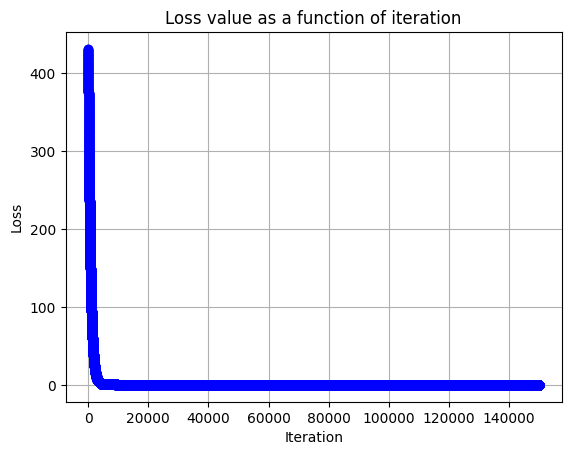

In [15]:
model = LinearRegression(training_features, training_labels.T , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

# Plotting
plt.plot(x, values, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss value as a function of iteration")
plt.grid(True)
plt.show()



#### Prediction Details

In [17]:
print("Predicted weights ", model.weight, " bias ", model.bias)
print("Prediction loss", model.calculateMseLoss(ModelEquation(testing_attributes[0], testing_attributes[1]),model.predict(testing_attributes)))

Predicted weights  [[6.18365279]
 [6.82161173]]  bias  7.593484418542068


ValueError: Length mismatch